## Assess plate and well position effects (Fig 3A)

Use mAP to assess plate and well position effects by cross-checking phenotypic activity retrieval (replicates against neg cons) rates for 3 scenarios:
 * replicates located on different plates and in different well positions
 * replicates located on different plates, but in the same well position
 * replicates located on the same plate and in different well positions

In [1]:
from pathlib import Path
from itertools import combinations

import numpy as np
import pandas as pd

from map_utils.map import calculate_map
from map_utils.plot import plot_map_x3_hue, set_plotting_style
from cell_health_utils import (
    get_6well_plate_pairs,
    get_cell_line_colors,
    stouffer_method,
)

In [2]:
set_plotting_style()
cell_line_colors = get_cell_line_colors()

ch_std_path = Path(
    "data/profiles/cell_health_profiles_merged_standardized_featureselected.tsv.gz"
)
ch_mad_path = Path(
    "data/profiles/cell_health_profiles_merged_wholeplate_normalized_featureselected.tsv.gz"
)

ch_std_df = pd.read_csv(ch_std_path, sep="\t")
ch_mad_df = pd.read_csv(ch_mad_path, sep="\t")

print(ch_std_df.shape, ch_mad_df.shape)

(3456, 403) (3456, 513)


In [3]:
cell_lines = ["A549", "ES2", "HCC44"]

data_configs = {"Standardize": ch_std_df, "MAD robustize": ch_mad_df}

mode_configs = {
    "different plate, different well": {
        "pos_sameby": {"all": [], "any": []},
        "pos_diffby": {"all": ["Metadata_Plate", "Metadata_Well"], "any": []},
    },
    "different plate, same well": {
        "pos_sameby": {"all": ["Metadata_Well"], "any": []},
        "pos_diffby": {"all": ["Metadata_Plate"], "any": []},
    },
    "same plate, different well": {
        "pos_sameby": {"all": ["Metadata_Plate"], "any": []},
        "pos_diffby": {"all": ["Metadata_Well"], "any": []},
    },
}

map_config = {
    "null_size": 10000,
    "groupby_columns": ["Metadata_pert_name"],
}

results = []

for data_key, data_value in data_configs.items():
    for cell_line in cell_lines:
        df_6wells = get_6well_plate_pairs(data_value, cell_line)
        plate_pairs = list(combinations(df_6wells["Metadata_Plate"].unique(), 2))

        for plate_pair in plate_pairs:
            ch_dfA549_6wells_2plates = df_6wells.query(
                "Metadata_Plate in @plate_pair"
            ).reset_index(drop=True)

            for mode_key, mode_value in mode_configs.items():
                pair_config = {
                    "pos_sameby": {
                        "all": ["Metadata_pert_name", "Metadata_control_index"],
                        "any": [],
                    },
                    "pos_diffby": {"all": [], "any": []},
                    "neg_sameby": {"all": [], "any": []},
                    "neg_diffby": {
                        "all": ["Metadata_pert_name", "Metadata_control_index"],
                        "any": [],
                    },
                }

                pair_config["pos_sameby"]["all"].extend(mode_value["pos_sameby"]["all"])
                pair_config["pos_diffby"]["all"].extend(mode_value["pos_diffby"]["all"])

                map_results = calculate_map(
                    ch_dfA549_6wells_2plates, pair_config, map_config
                )
                map_results["mode"] = mode_key
                map_results["Preprocessing"] = data_key
                map_results["Cell type"] = cell_line
                results.append(map_results)

results = pd.concat(results).reset_index(drop=True)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/map/map_utils/plot.py:274: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


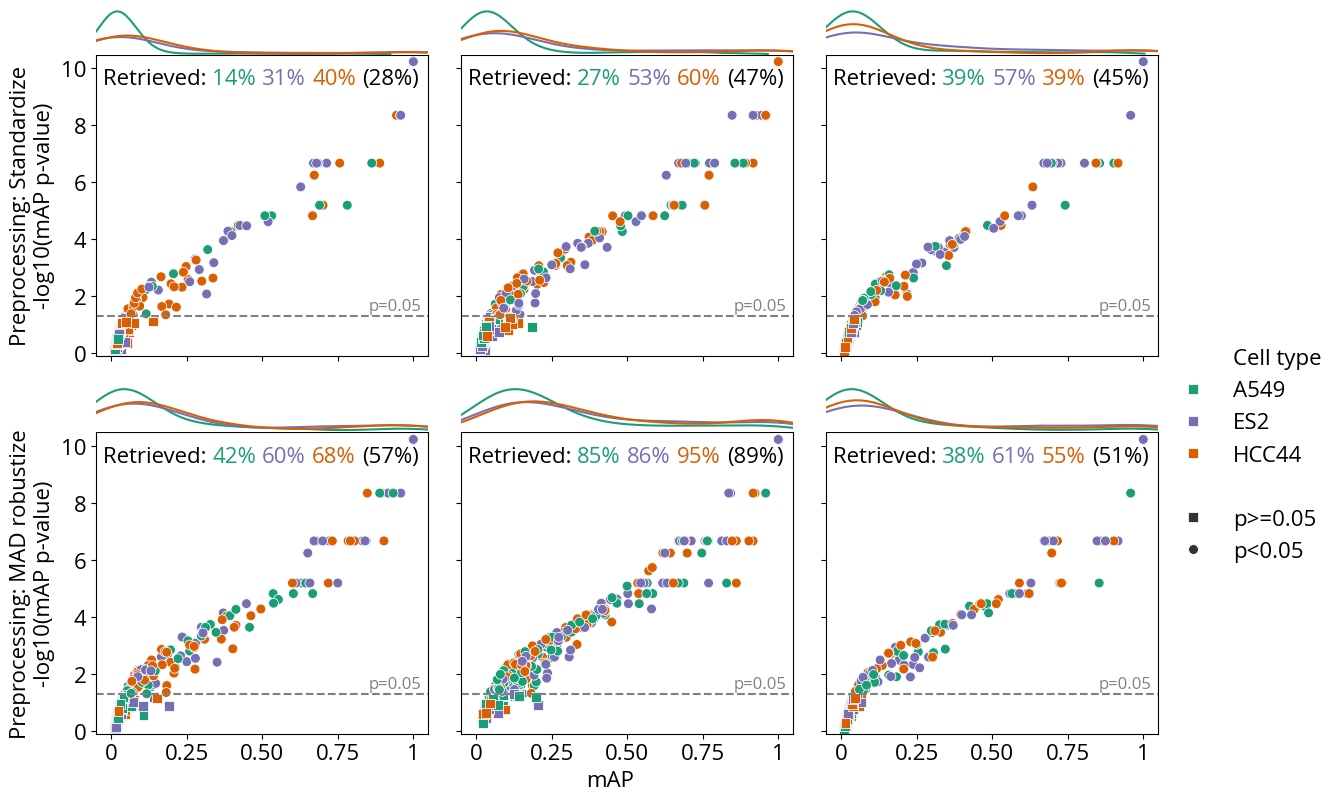

In [4]:
results_agg = (
    results.groupby(["Metadata_pert_name", "mode", "Preprocessing", "Cell type"])
    .agg({"mAP": "mean", "p_value": stouffer_method})
    .reset_index()
)
results_agg["p < 0.05"] = results_agg["p_value"] < 0.05
results_agg["markers"] = np.where(results_agg["p_value"] < 0.05, "p<0.05", "p>=0.05")
results_agg["-log10(mAP p-value)"] = -np.log10(
    results_agg["p_value"].clip(lower=np.finfo(float).eps)
)

results_agg.to_csv("results/plate_well_position_map.csv", index=False)

plot_map_x3_hue(
    results_agg,
    "mode",
    "",
    hue_col="Cell type",
    palette=cell_line_colors,
    y_label="Preprocessing",
    row="Preprocessing",
    move_legend="center left",
    pr_x=0.35,
    pr_y=0.9,
    figure="Fig3A",
    save_path="figures",
)